# YouTube comments analyzing

## Importing packages

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud , STOPWORDS
from textblob import TextBlob
from collections import Counter
from plotly.offline import iplot

## Reading the csv file

In [2]:
# Reading a .csv file (on_bad_lines='warn' is used to skip bad lines while parsing the data))
comments = pd.read_csv('/Users/olhababenko/Documents/projects/DA_real_projects/Youtube_project_shan_singh_Udemy/UScomments.csv', 
            on_bad_lines='warn')

# Showing the first 5 raws of DataFrame
comments.head()

Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

/var/folders/px/nncxr9z97fv2xzbxs80p78mm0000gn/T/ipykernel_39024/743481211.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('/Users/olhababenko/Documents/projects/DA_real_projects/Youtube_project_shan_singh_Udemy/UScomments.csv',


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## Data cleansing

In [3]:
# Cheking ammount of missing values by columns
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [4]:
# Getting rid of missing values
comments_v1 = comments.dropna(inplace=False)

# Cheking ammount of missing values by columns
comments_v1.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## Creating a wordcloud

In [5]:
# Analyzing the sentiment of the comment with TextBlob
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [6]:
# Information about the DataFrame
comments_v1.info()

# Creating an empty list with all of the polarity values
# Polarity is in a range [-1;1], where -1 is negative
polarity = []

# Parsing through the DataFrame with 'for' loop to make a polarity values for each comment
for comment in comments_v1['comment_text']:
    # Entering the try-except case to avoid error and assign zero value to undefined comment polarity
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)


<class 'pandas.core.frame.DataFrame'>
Index: 691374 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691374 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691374 non-null  object
 3   replies       691374 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


In [7]:
# Add a new column 'polarity' to the DataFrame
comments_v1['polarity'] = polarity

# Cheking if the column is added
comments_v1.head()

/var/folders/px/nncxr9z97fv2xzbxs80p78mm0000gn/T/ipykernel_39024/2212366824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_v1['polarity'] = polarity


,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [8]:
# Creating filters to positive and negative comments
pos_filter = comments_v1['polarity'] == 1
neg_filter = comments_v1['polarity'] == -1

# Creating new DataFrame with filtered positive and negative comments
comments_positive = comments_v1[pos_filter]
comments_negative = comments_v1[neg_filter]

comments_positive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19390 entries, 64 to 691393
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   video_id      19390 non-null  object 
 1   comment_text  19390 non-null  object 
 2   likes         19390 non-null  object 
 3   replies       19390 non-null  object 
 4   polarity      19390 non-null  float64
dtypes: float64(1), object(4)
memory usage: 908.9+ KB


In [9]:
# Setting the STOPWORDS for wordcloud
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [10]:
# Preparing the comments to wordcloud that accepts only string
comments['comment_text']

# Cheking the comments column type
type(comments['comment_text'])

# Creating a string with positive and negative comments
comments_positive_str = ' '.join(comments_positive['comment_text'])
comments_negative_str = ' '.join(comments_negative['comment_text'])

In [11]:
# Generating an image with most frequent words
wordcloud_positive = WordCloud(stopwords=set(STOPWORDS)).generate(comments_positive_str)
wordcloud_negative = WordCloud(stopwords=set(STOPWORDS)).generate(comments_negative_str)

(-0.5, 399.5, 199.5, -0.5)

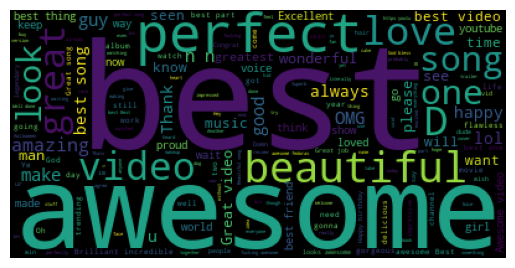

In [12]:
# Printing the generated image for positive comments
plt.imshow(wordcloud_positive)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

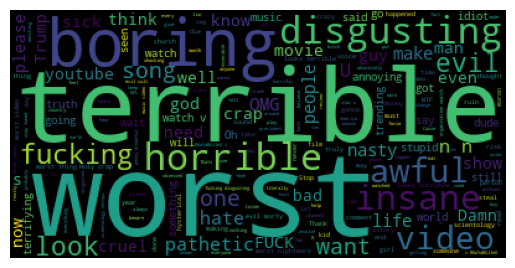

In [13]:
# Printing the generated image for negative comments
plt.imshow(wordcloud_negative)
plt.axis('off')

## Analysing the emoji

In [14]:
# Trying out how the emoji package works
comment = 'trending 😉'

# List comprehension
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [15]:
# Announcing a list where all emojis will be stored
all_emoji_list = []

# Loop for iterration through all of the comments
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)

all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [16]:
# Announcing the top emoji list with emoji and number of times it is met
top_emojis_count = Counter(all_emoji_list).most_common(10)

top_emojis_count

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [17]:
# List comprehension to create a list with emojis
top_emojis = [top_emojis_count[i][0] for i in range(len(top_emojis_count))]

top_emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [18]:
# List comprehension to create a list of emoji usage frequency
top_freq = [top_emojis_count[i][1] for i in range(len(top_emojis_count))]

top_freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [26]:
# Creating a bar chart using pyplot
trace = go.Bar(x = top_emojis, y = top_freq)

# Showing a created bar chart
iplot([trace])

In [38]:
import os
import warnings
from warnings import filterwarnings

In [39]:
files = os.listdir(r'/Users/olhababenko/Documents/projects/DA_real_projects/Youtube_project_shan_singh_Udemy/additional_data')

In [40]:
files_csv = [file for file in files if '.csv' in file]
filterwarnings('ignore')

In [42]:
full_df = pd.DataFrame()
path = r'/Users/olhababenko/Documents/projects/DA_real_projects/Youtube_project_shan_singh_Udemy/additional_data'

for file in files_csv:
    current_df = pd.read_csv(path + '/' + file, encoding='iso-8859-1', on_bad_lines='warn')

    full_df = pd.concat([full_df, current_df], ignore_index=True)

In [44]:
full_df.shape

(375942, 16)

In [45]:
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937    False
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [47]:
full_df = full_df.drop_duplicates()
full_df = full_df.dropna()
full_df.shape

(339525, 16)